<a href="https://colab.research.google.com/github/ziishanahmad/stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns  # For statistical data visualization
import yfinance as yf  # For fetching stock price data from Yahoo Finance
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # For building the linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation


In [7]:
# Define the stock ticker symbol and the time period
ticker = 'AAPL'  # Apple Inc. stock
start_date = '2010-01-01'
end_date = '2023-01-01'

# Fetch the stock price data from Yahoo Finance
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data to understand its structure
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


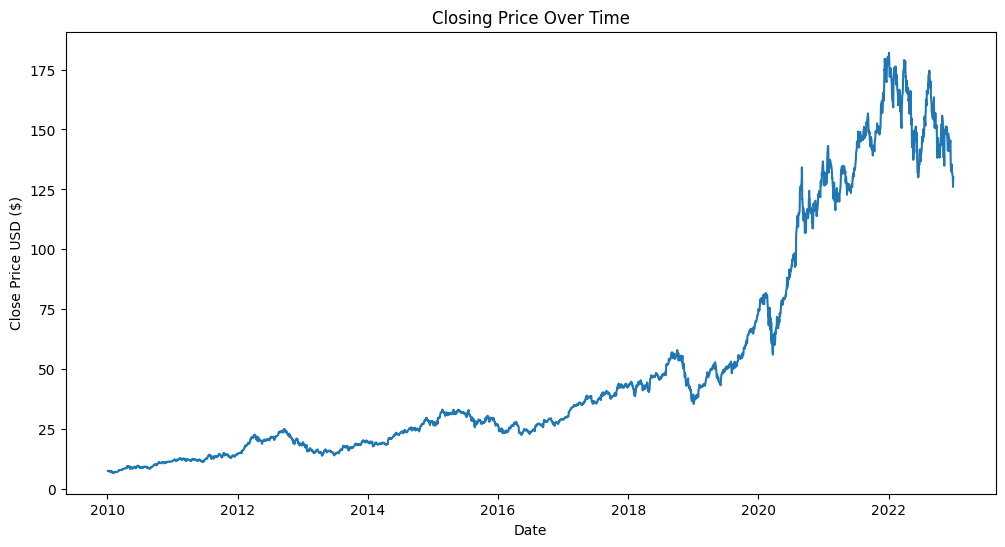

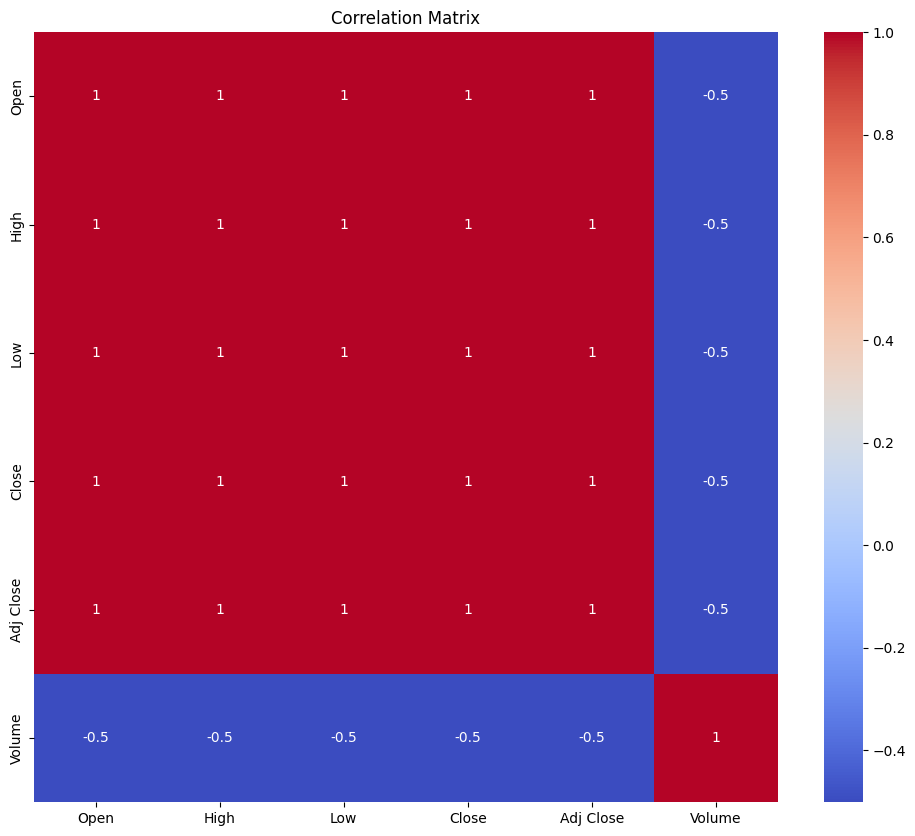

In [8]:
# Display the summary statistics of the dataset to understand its distribution
stock_data.describe()

# Visualize the closing price over time
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(stock_data['Close'])  # Plot the closing prices
plt.title('Closing Price Over Time')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Close Price USD ($)')  # Set the label for the y-axis
plt.show()  # Display the plot

# Visualize the correlation between different features
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')  # Create a heatmap to show correlations
plt.title('Correlation Matrix')  # Set the title of the heatmap
plt.show()  # Display the heatmap


In [9]:
# Create a new DataFrame with only the 'Close' column
data = stock_data[['Close']]

# Create a column to predict the 'Close' price shifted by 1 day
data['Prediction'] = data['Close'].shift(-1)

# Drop the last row as it will have a NaN value after the shift
data.dropna(inplace=True)

# Define the feature set (X) and the target variable (y)
X = data[['Close']].values  # Features are the 'Close' prices
y = data['Prediction'].values  # Target is the 'Prediction' column

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% for training
# random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to have zero mean and unit variance
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler


<ipython-input-9-168eb34c1756>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data['Close'].shift(-1)
<ipython-input-9-168eb34c1756>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 1.62
R-squared: 1.00


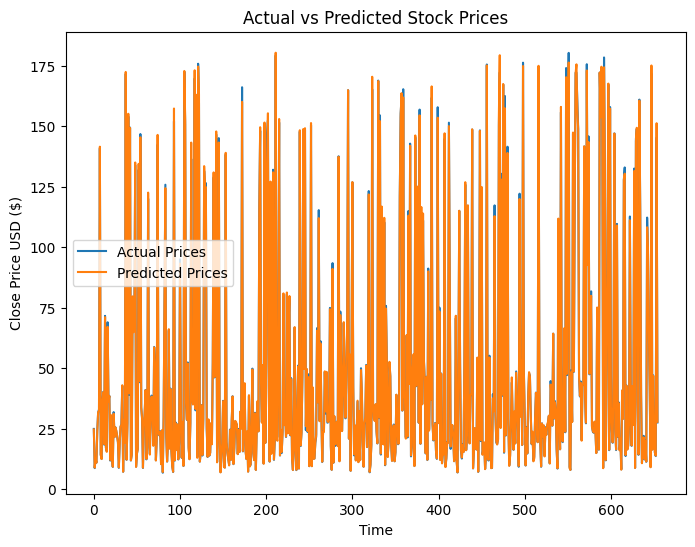

In [11]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and the R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)  # MSE measures the average squared difference between the actual and predicted values
r2 = r2_score(y_test, y_pred)  # R2 score measures how well the model explains the variance in the target variable

# Print the MSE and R2 score
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the actual vs predicted stock prices
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(y_test, label='Actual Prices')  # Plot the actual prices
plt.plot(y_pred, label='Predicted Prices')  # Plot the predicted prices
plt.title('Actual vs Predicted Stock Prices')  # Set the title of the plot
plt.xlabel('Time')  # Set the label for the x-axis
plt.ylabel('Close Price USD ($)')  # Set the label for the y-axis
plt.legend()  # Add a legend to differentiate between actual and predicted prices
plt.show()  # Display the plot
